<a href="https://colab.research.google.com/github/samarcherif/project-challenge-spot-mask/blob/master/computervision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Elaborated by Cherif Mongia


# project challenge spot mask

Face masks have become a common public sight in the last few months. The Centers for Disease Control (CDC) recently advised the use of simple cloth face coverings to slow the spread of the virus and help people who may have the virus and do not know it from transmitting it to others. Wearing masks is broadly recognised as critical to reducing community transmission and limiting touching of the face.

In a time of concerns about slowing the transmission of COVID-19, increased surveillance combined with AI solutions can improve monitoring and reduce the human effort needed to limit the spread of this disease. The objective of this challenge is to create an image classification machine learning model to accurately predict the likelihood that an image contains a person wearing a face mask, or not. The total dataset contains 1,800+ images of people either wearing masks or not.

Our machine learning solution will help policymakers, law enforcement, hospitals, and even commercial businesses ensure that masks are being worn appropriately in public. These solutions can help in the battle to reduce community transmission of COVID-19.

## Import librairies 

In [ ]:
%tensorflow_version 2.x #to avoid loading another version at run time (since you can't change it after it's imported)
import tensorflow as tf
import os
import cv2
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.python.keras import layers 
from tensorflow.python.keras import models
from keras import optimizers
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing.image import img_to_array, load_img


`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x #to avoid loading another version at run time (since you can't change it after it's imported)`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


## Functions 


In [ ]:
###Functions

def normalize(train_images_, test_images_):
	# convert from integers to floats
	train_norm = train_images_.astype('float32')
	test_norm = test_images_.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

def resize_images(images):
  """ Returns an Array of resized images """

  train = []
  j=0
  for image in images:
    # train_X.append(cv2.resize(cv2.cvtColor(cv2.imread('drive/My Drive/Dauphine_Projet_Image2020/images/'+label), cv2.COLOR_BGR2RGB), (NROWS,NCOLS),interpolation=cv2.INTER_CUBIC))
    image = tf.image.resize(cv2.imread('drive/My Drive/Dauphine_Projet_Image2020/images/'+image), sizes=(256,256))
    train_X.append(image)
    j+=1
    print(j/len(images))
  
  return train

def accuracy_lost_curves(history):
  # plot loss
  fig = plt.figure(figsize=(8,8))
  ax1 = fig.add_subplot(2,1,1)
  ax1.plot(history.history['loss'], color='blue', label='train')
  ax1.plot(history.history['val_loss'], color='orange', label='test')
  ax1.set_title('Cross Entropy Loss')
  ax1.legend(['Training Loss', 'Validation Loss'])
	# plot accuracy
  ax2 = fig.add_subplot(2,1,2)
  ax2.plot(history.history['accuracy'], color='blue', label='train')
  ax2.plot(history.history['val_accuracy'], color='orange', label='test')
  ax2.set_title('Classification Accuracy')
  ax2.legend(['Training Acc', 'Validation Acc'])  

## Download Data

We upload our data image.zip/ train labels/ sub

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
train_labels=pd.read_csv("/content/drive/My Drive/Dauphine_Projet_Image2020/train_labels.csv")
sample_sub=pd.read_csv("/content/drive/My Drive/Dauphine_Projet_Image2020/sample_sub_v2.csv")
train_labels.shape,sample_sub.shape


((1308, 2), (509, 2))

## split our data to train and test 

In [ ]:
images= os.listdir('/content/drive/My Drive/Dauphine_Projet_Image2020/images')
len(images)

1817

In [ ]:
images= os.listdir('/content/drive/My Drive/Dauphine_Projet_Image2020/images')
train_labels_list = list(train_labels['image'])
test_labels_list = [fn for fn in images if fn not in train_labels_list]
len(images),len(train_labels_list),len(test_labels_list)

(1817, 1308, 509)

##show a random image from the train_labels

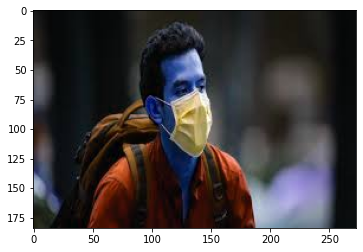

In [ ]:
import random
sample=random.choice(train_labels['image']) #picking random sample from data list
img=cv2.imread('drive/My Drive/Dauphine_Projet_Image2020/images/'+sample)
plt.imshow(img)

## Visualization data

Here i create some visualization to see the partition of people who wear masks or not


Text(0, 0.5, 'Amount')

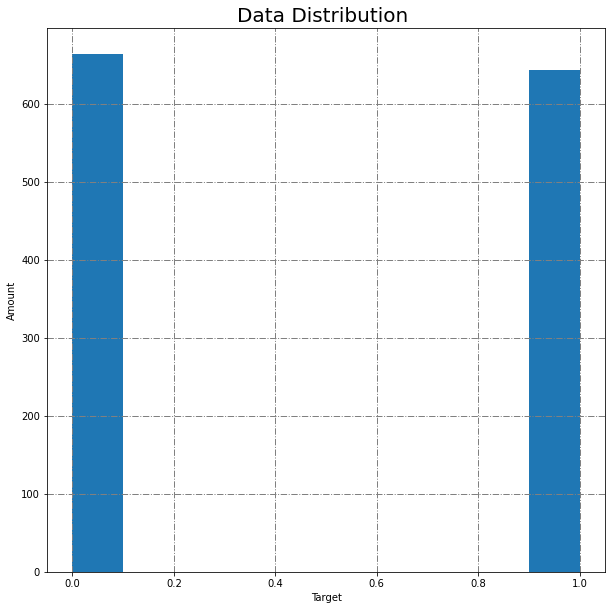

In [ ]:
to_plot = train_labels['target']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()    
ax.hist(to_plot)
ax.grid(linestyle = '-.' , linewidth = 1 , color = '.5')
ax.set_title("Data Distribution " , fontsize = 20)
ax.set_xlabel("Target")
ax.set_ylabel("Amount")

Text(0.5, 1.0, 'Data Distribution ')

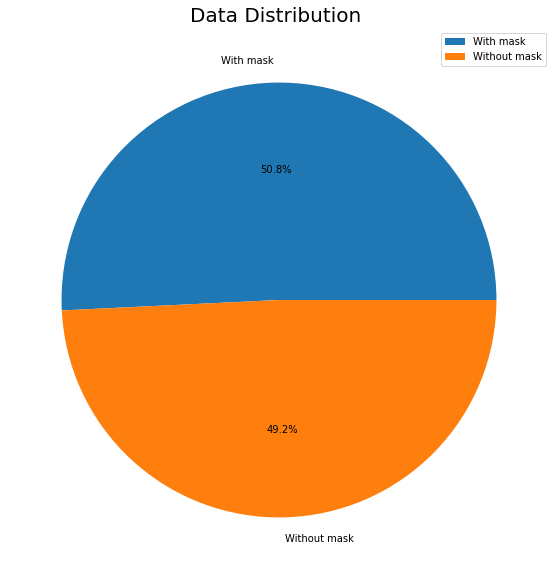

In [ ]:
import numpy as np
fig = plt.figure(figsize =(10,10)) 
ax = fig.add_subplot()
all_data = train_labels['target'].value_counts()
sizes = (np.array((all_data / all_data.sum())*100))
legend = [x  for x in all_data.index]
labels = [ "With mask" , "Without mask"]
ax.pie(all_data , labels=labels , autopct='%1.1f%%')
ax.legend(labels) 
ax.set_title("Data Distribution " , fontsize = 20)

#### Result: 
we see that the number of people who wear masks almost close to people without masks

## Transform our image

The idea behind this transforamtion we need to get all the image same size so we do some transformation for the size.

In [ ]:
X_train = resize_images(list(train_labels['image']))
Y_train = list(train_labels['target'])

In [ ]:
len(X_train),len(Y_train)

(1308, 1308)

In [ ]:
resize=True
if resize:
  import time
  start_time = time.time()
  X_train = np.array([np.array(image) for image in X_train])
  Y_train = np.array([np.array(image) for image in Y_train])
  print("--- %s seconds ---" % (time.time() - start_time))


--- 4.5453901290893555 seconds ---


## Split data to train and validation

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(X_train,Y_train, test_size=0.2)


## Encode and normalize the data

* Encode classes (from integers into one-hot vectors)

* Normalize images (floats & values between [0-1])

In [ ]:
train_labels_encoded = tf.keras.utils.to_categorical(y_train)
test_labels_encoded = tf.keras.utils.to_categorical(y_val)
train_images, test_images = normalize(x_train, x_val)
category_size=train_labels_encoded.shape[1]
print('Phase 1/5: DataLoaded, Encoded And Normalized')
input_shape=train_images[0].shape

Phase 1/5: DataLoaded, Encoded And Normalized


In [ ]:
category_size #we have 2 category people who wear mask and without mask

2

## First model: Baseline Model 


In [ ]:
#### Create a basic model made of a convolutional bloc (e.g., at least one convolutional layer followed by a maxpooling layer)
def conv_block(filter_size_, kernel_size_, max_pooling_size_, activation_type_=None, input_shape_=None): 
  model_ = tf.keras.Sequential()
  model_.add(tf.keras.layers.Conv2D(filters=filter_size_, kernel_size=kernel_size_, activation=activation_type_, input_shape=input_shape_, padding='same'))
  model_.add(tf.keras.layers.Conv2D(filters=filter_size_, kernel_size=kernel_size_, activation=activation_type_, padding='same'))
  model_.add(tf.keras.layers.BatchNormalization())
  model_.add(tf.keras.layers.MaxPooling2D(max_pooling_size_))
  model_.add(tf.keras.layers.Dropout(0.2))

  model_.add(tf.keras.layers.Conv2D(filters=filter_size_*2, kernel_size=kernel_size_, activation=activation_type_, padding='same'))
  model_.add(tf.keras.layers.Conv2D(filters=filter_size_*2, kernel_size=kernel_size_, activation=activation_type_, padding='same'))
  model_.add(tf.keras.layers.BatchNormalization())
  model_.add(tf.keras.layers.MaxPooling2D(max_pooling_size_))
  model_.add(tf.keras.layers.Dropout(0.3))

  model_.add(tf.keras.layers.Conv2D(filters=filter_size_*4, kernel_size=kernel_size_, activation=activation_type_, padding='same'))
  model_.add(tf.keras.layers.Conv2D(filters=filter_size_*4, kernel_size=kernel_size_, activation=activation_type_, padding='same'))
  model_.add(tf.keras.layers.Conv2D(filters=filter_size_*4, kernel_size=kernel_size_, activation=activation_type_, padding='same'))
  model_.add(tf.keras.layers.BatchNormalization())
  model_.add(tf.keras.layers.MaxPooling2D(max_pooling_size_))
  model_.add(tf.keras.layers.Dropout(0.4))

  return model_

In [ ]:
base_model = conv_block(32, (3, 3), (2, 2), activation_type_='relu', input_shape_=input_shape)

In [ ]:
base_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 256, 256, 32)      9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 128, 128, 64)     

In [ ]:
top_layers = tf.keras.Sequential()
top_layers.add(tf.keras.layers.Flatten())
top_layers.add(tf.keras.layers.Dense(1024, activation='relu'))
top_layers.add(tf.keras.layers.Dense(512, activation='relu'))
top_layers.add(tf.keras.layers.Dense(128, activation='relu'))
top_layers.add(tf.keras.layers.Dense(32, activation='relu'))
top_layers.add(tf.keras.layers.Dense(category_size,activation='softmax'))

model= tf.keras.Sequential([base_model, top_layers])

In [ ]:
#### Compile your model (use SGD optimizer and choose a relevant loss and metric)
opt = tf.keras.optimizers.SGD(lr=0.0005, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
augment_data=True
if augment_data:
  datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
  it_train = datagen.flow(train_images, train_labels_encoded, batch_size=64)

In [ ]:
#### Fit your model (you can use the test set as your validation data)
epochs = 100
if augment_data:
  print("Training with Augmented Data")
  steps = int(train_images.shape[0] / 64)
  history = model.fit(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(test_images, test_labels_encoded), verbose=1)
else: 
  print("Training withOUT Augmented Data")
  history = model.fit(train_images, train_labels_encoded, epochs=epochs, batch_size=64, 
                    validation_data=(test_images, test_labels_encoded))

Training with Augmented Data
Epoch 1/100
16/16 [==============================] - 14s 871ms/step - loss: 0.6763 - accuracy: 0.5804 - val_loss: 0.9028 - val_accuracy: 0.5115
Epoch 2/100
16/16 [==============================] - 14s 855ms/step - loss: 0.6496 - accuracy: 0.6191 - val_loss: 1.0362 - val_accuracy: 0.5115
Epoch 3/100
16/16 [==============================] - 15s 911ms/step - loss: 0.6486 - accuracy: 0.6324 - val_loss: 1.1281 - val_accuracy: 0.5115
Epoch 4/100
16/16 [==============================] - 14s 854ms/step - loss: 0.6261 - accuracy: 0.6650 - val_loss: 1.2428 - val_accuracy: 0.5115
Epoch 5/100
16/16 [==============================] - 14s 858ms/step - loss: 0.6031 - accuracy: 0.6894 - val_loss: 1.3937 - val_accuracy: 0.5115
Epoch 6/100
16/16 [==============================] - 14s 860ms/step - loss: 0.6057 - accuracy: 0.6853 - val_loss: 1.6058 - val_accuracy: 0.5115
Epoch 7/100
16/16 [==============================] - 14s 855ms/step - loss: 0.5822 - accuracy: 0.6976 - val

In [ ]:
model.evaluate(test_images, test_labels_encoded)

9/9 [==============================] - 0s 46ms/step - loss: 1.1466 - accuracy: 0.7214


[1.1466217041015625, 0.7213740348815918]

I train the baseline model with data augmentation and without it and i conclued that we get accuracy equal to 0.72 better than the other model. 

## second model: VGG19
I use the model with transfer learning VGG19 using data augmentation 

In [ ]:
base_model = tf.keras.applications.VGG19(weights = 'imagenet', include_top = False, input_shape=input_shape)
base_model.trainable = True

80142336/80134624 [==============================] - 2s 0us/step


In [ ]:

top_layers = tf.keras.Sequential()
top_layers.add(tf.keras.layers.GlobalAveragePooling2D())
#top_layers.add(tf.keras.layers.Flatten())
top_layers.add(tf.keras.layers.Dense(128, activation='relu'))
top_layers.add(tf.keras.layers.BatchNormalization())
top_layers.add(tf.keras.layers.Dropout(0.9))
top_layers.add(tf.keras.layers.Dense(category_size,activation='softmax'))

model= tf.keras.Sequential([base_model, top_layers])

In [ ]:
opt = tf.keras.optimizers.SGD(lr=0.0005, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
it_train = datagen.flow(train_images, train_labels_encoded, batch_size=64)

In [ ]:
#### Fit your model (you can use the test set as your validation data)
epochs = 70

print("Training with Augmented Data")
steps = int(train_images.shape[0] / 64)
history = model.fit(it_train, steps_per_epoch=steps, epochs=epochs, validation_data=(test_images, test_labels_encoded), verbose=1)


Training with Augmented Data
Epoch 1/70
16/16 [==============================] - 31s 2s/step - loss: 1.5658 - accuracy: 0.5153 - val_loss: 0.7181 - val_accuracy: 0.5115
Epoch 2/70
16/16 [==============================] - 21s 1s/step - loss: 1.2034 - accuracy: 0.5550 - val_loss: 0.7397 - val_accuracy: 0.5115
Epoch 3/70
16/16 [==============================] - 21s 1s/step - loss: 1.0336 - accuracy: 0.5285 - val_loss: 0.7309 - val_accuracy: 0.4885
Epoch 4/70
16/16 [==============================] - 21s 1s/step - loss: 0.7317 - accuracy: 0.5499 - val_loss: 0.6962 - val_accuracy: 0.5115
Epoch 5/70
16/16 [==============================] - 21s 1s/step - loss: 0.6519 - accuracy: 0.6242 - val_loss: 0.7051 - val_accuracy: 0.5115
Epoch 6/70
16/16 [==============================] - 21s 1s/step - loss: 0.6608 - accuracy: 0.6415 - val_loss: 0.6995 - val_accuracy: 0.5115
Epoch 7/70
16/16 [==============================] - 21s 1s/step - loss: 0.6150 - accuracy: 0.6792 - val_loss: 0.7299 - val_accuracy

In [ ]:
model.evaluate(test_images, test_labels_encoded)

9/9 [==============================] - 2s 184ms/step - loss: 0.2839 - accuracy: 0.9046


[0.2839047610759735, 0.9045801758766174]

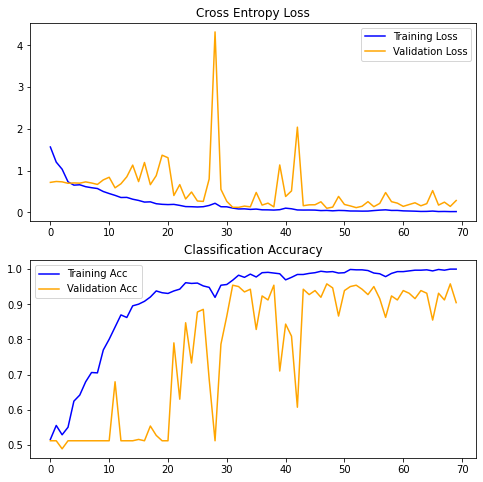

In [ ]:
accuracy_lost_curves(history)

##Conclusion

For the VGG we got a  0.9046 it's better than the baseline model but we can obtain a good model than this one.

I create also the model EfficientNet-B1 with the framework Fastai (the notebook2) and i got an accuracy more better.